# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Labib Muyassar]
- **Email:** [m200d4ky2863@bangkit.academy]
- **ID Dicoding:** [m200d4ky2863]

## Menentukan Pertanyaan Bisnis

- Negara mana yang memiliki seller paling banyak dan paling sedikit?
- Negara manakah yang memperoleh harga produk tertinggi atau terendah?

## Import Semua Packages/Library yang Digunakan

In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [79]:
order_items_df= pd.read_csv("https://raw.githubusercontent.com/labibmyssr/Analisis-Data-dengan-Python/main/data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [80]:
seller_dataset_df = pd.read_csv("https://raw.githubusercontent.com/labibmyssr/Analisis-Data-dengan-Python/main/data/sellers_dataset.csv")
seller_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [81]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [82]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [83]:
print("Jumlah duplikasi pada order_items: ", order_items_df.duplicated().sum())

Jumlah duplikasi pada order_items:  0


In [84]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [85]:
seller_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [86]:
seller_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [87]:
print("Jumlah duplikasi: ", seller_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [88]:
seller_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [89]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [90]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [91]:
order_items_df.describe(include="all")

<ipython-input-91-1623112fb46c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [92]:
seller_dataset_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [93]:
seller_dataset_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [94]:
seller_dataset_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [95]:
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

In [96]:
order_item_sellers_df = pd.merge(
    left=seller_dataset_df,
    right=order_items_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_item_sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,total_price
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,115.76
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,117.62
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,13.22
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,135.08
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,221.79


In [97]:
order_item_sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   seller_id               112650 non-null  object        
 1   seller_zip_code_prefix  112650 non-null  int64         
 2   seller_city             112650 non-null  object        
 3   seller_state            112650 non-null  object        
 4   order_id                112650 non-null  object        
 5   order_item_id           112650 non-null  int64         
 6   product_id              112650 non-null  object        
 7   shipping_limit_date     112650 non-null  datetime64[ns]
 8   price                   112650 non-null  float64       
 9   freight_value           112650 non-null  float64       
 10  total_price             112650 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 10.3+ MB


In [98]:
order_item_sellers_df.describe()

,seller_zip_code_prefix,order_item_id,price,freight_value,total_price
count,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,24439.170431,1.197834,120.653739,19.990320,140.644059
std,27596.030909,0.705124,183.633928,15.806405,190.724394
min,1001.000000,1.000000,0.850000,0.000000,6.080000
25%,6429.000000,1.000000,39.900000,13.080000,55.220000
50%,13568.000000,1.000000,74.990000,16.260000,92.320000
75%,27930.000000,1.000000,134.900000,21.150000,157.937500
max,99730.000000,21.000000,6735.000000,409.680000,6929.310000


In [99]:
order_item_sellers_df.to_csv('main_data.csv')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Negara mana yang memiliki seller paling banyak dan paling sedikit?

<ipython-input-100-37018a959a10>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-100-37018a959a10>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


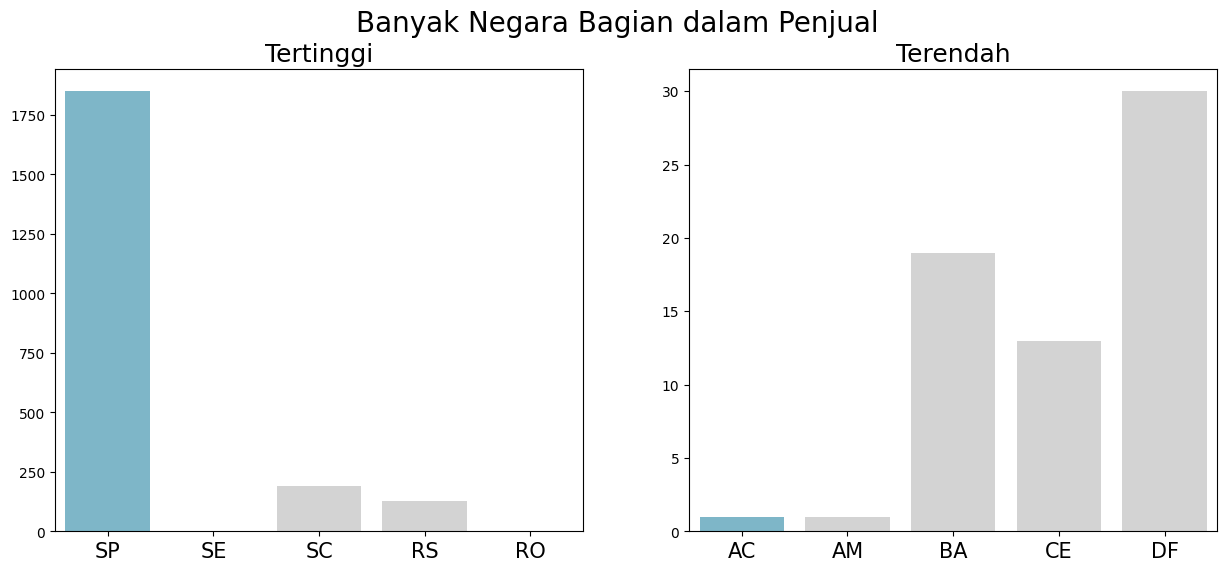

In [100]:
stateseller_df = order_item_sellers_df.groupby(by="seller_state").seller_id.nunique().reset_index()
stateseller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)

cityseller_df =  order_item_sellers_df.groupby(by="seller_city").seller_id.nunique().reset_index()
cityseller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
colors1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="seller_count",
    x="seller_state",
    data=stateseller_df.sort_values(by="seller_state", ascending=False).head(),
    palette=colors1,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(
    y="seller_count",
    x="seller_state",
    data=stateseller_df.sort_values(by="seller_state", ascending=True).head(),
    palette=colors1,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Banyak Negara Bagian dalam Penjual", fontsize=20)

plt.show()

### Pertanyaan 2: Negara manakah yang memperoleh harga produk tertinggi atau terendah?


<ipython-input-101-debc93a961a7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-101-debc93a961a7>:9: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-101-debc93a961a7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-101-debc93a961a7>:21: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


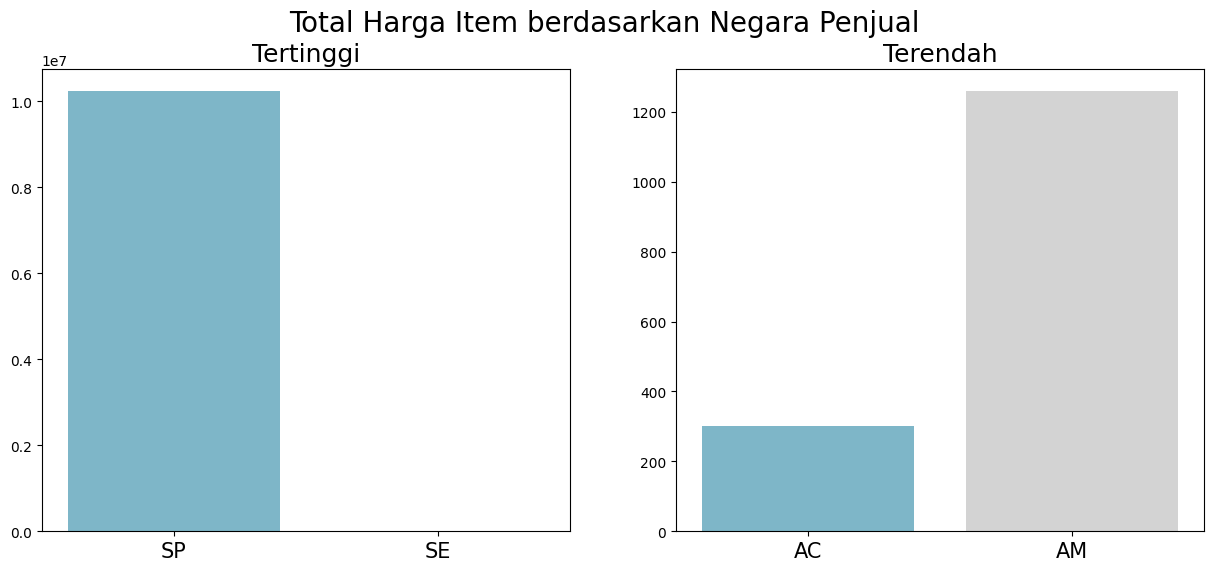

In [101]:
totalstate_df = order_item_sellers_df.groupby(by="seller_state").total_price.sum().reset_index()
totalstate_df.rename(columns={
    "total_price": "total"
}, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
colors1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="total",
    x="seller_state",
    data=totalstate_df.sort_values(by="seller_state", ascending=False).head(2),
    palette=colors1,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(
    y="total",
    x="seller_state",
    data=totalstate_df.sort_values(by="seller_state", ascending=True).head(2),
    palette=colors1,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Terendah", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Total Harga Item berdasarkan Negara Penjual", fontsize=20)

plt.show()



## Conclusion

- Negara yang memiliki jumlah seller tertinggi adalah SP dan terendah adalah AC dan AM
- Negara yang memperoleh harga produk tertinggi adalah SP dan terendah adalah AC